In [33]:
#importing packages

import pandas as pd 
import numpy as np 
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar
import seaborn as sns

from sklearn.linear_model import LinearRegression


Dataset Import and Index fixing

In [2]:
data_steel = pd.read_csv('Stainless-Steel-Prices-Forecasty-Assignment.csv')

In [3]:
data_steel['Date'] = pd.to_datetime(data_steel['Date'])

In [4]:
data_steel.set_index('Date', inplace = True)

In [5]:
data_steel.index.freq = "MS"

In [25]:
data_steel.head()

,StainlessSteelPrice
Date,
2013-07-01,0.827352
2013-08-01,0.760221
2013-09-01,0.784715
2013-10-01,0.769293
2013-11-01,0.750242


In [24]:
data_steel.drop(data_steel.iloc[:, 1:], inplace = True, axis = 1)

In [75]:
#directional Symmetry

def directional(y, y_hat):
    n = len(y)
    yd = np.array(y)
    y_hatd = np.array(y_hat)
    
    i = 1
    nsum =0
    for i in range(1, len(yd)):

        if(((yd[i]-yd[i-1]) * (y_hatd[i]-y_hatd[i-1])) > 0):
            value = 1
            nsum = nsum + value
    result = np.multiply(np.divide(100, n-1), nsum)
    return result

#### Linear Regression

In [76]:
time = [i+1 for i in range(len(data_steel))]

In [77]:
# Splitting Train and Test Length
train_len = int(np.ceil(len(data_steel) * 0.80))
train_len

68

In [78]:
data1 = data_steel.copy()
data1['time'] = time
train=data1[0:train_len+1] 
test=data1[train_len:]

In [79]:
print('Train data length :',len(train))
print('Test  data length :',len(test))

Train data length : 69
Test  data length : 16


In [80]:
x_train = train.drop('StainlessSteelPrice',axis=1)
x_test = test.drop('StainlessSteelPrice', axis=1)
y_train = train[['StainlessSteelPrice']]
y_test = test[['StainlessSteelPrice']]

In [81]:
model = LinearRegression()

In [82]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:

predictions = model.predict(x_test)

In [84]:
y_test['RegOnTime'] = predictions

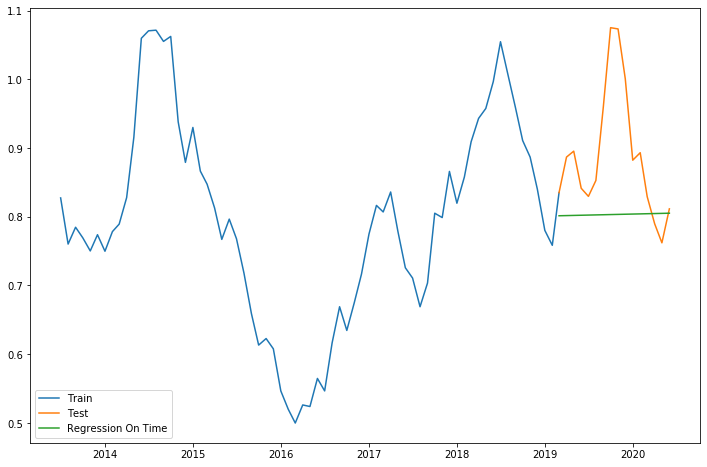

In [85]:
plt.figure(figsize=(12,8))
plt.plot( train['StainlessSteelPrice'], label='Train')
plt.plot(test['StainlessSteelPrice'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')
plt.show()

In [86]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.StainlessSteelPrice, y_test.RegOnTime))
rmse = round(rmse, 3)

In [87]:
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['StainlessSteelPrice']-y_test['RegOnTime'])
actual = y_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),3)
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'RMSE': [rmse]})
resultsDf

,Method,RMSE
0,RegressionOnTime,0.125


In [88]:
dire = directional(y_test['StainlessSteelPrice'], y_test['RegOnTime'])

In [89]:
# Storing results in a dataframe
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'MAPE': [mape], 'RMSE': [rmse], 'DS': [dire]})
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE', 'DS']]
resultsDf

,Method,RMSE,MAPE,DS
0,RegressionOnTime,0.125,0.097,46.666667


### Monthly Seasonality

In [90]:
#we are taking the monthly change of price in account 
time = [i+1 for i in range(len(data_steel))]
data1 = data_steel.copy()
data1['time'] = time

In [91]:
data1.describe()

,StainlessSteelPrice,time
count,84.000000,84.000000
mean,0.810715,42.500000
std,0.143444,24.392622
min,0.499859,1.000000
25%,0.743778,21.750000
50%,0.812157,42.500000
75%,0.893690,63.250000
max,1.075014,84.000000


In [92]:
#12 months 
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [93]:
even = monthSeasonality * 7

data1['monthSeasonality'] = even 
data1.head(2)

,StainlessSteelPrice,time,monthSeasonality
Date,,,
2013-07-01,0.827352,1,m1
2013-08-01,0.760221,2,m2


In [94]:
data1Complete = pd.get_dummies(data1, drop_first=True)
data1Complete.head(2).T

Date,2013-07-01,2013-08-01
StainlessSteelPrice,0.827352,0.760221
time,1.000000,2.000000
monthSeasonality_m10,0.000000,0.000000
monthSeasonality_m11,0.000000,0.000000
monthSeasonality_m12,0.000000,0.000000
monthSeasonality_m2,0.000000,1.000000
monthSeasonality_m3,0.000000,0.000000
monthSeasonality_m4,0.000000,0.000000
monthSeasonality_m5,0.000000,0.000000
monthSeasonality_m6,0.000000,0.000000


In [95]:
#Creating train and test set 
train=data1Complete[0:train_len+1] 
test=data1Complete[train_len:]

In [96]:
x_train = train.drop('StainlessSteelPrice', axis=1)
x_test = test.drop('StainlessSteelPrice', axis=1)
y_train = train[['StainlessSteelPrice']]
y_test = test[['StainlessSteelPrice']]

In [97]:
model1 = LinearRegression()

In [98]:
model1.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
predictions = model1.predict(x_test)


In [100]:
y_test['RegOnTimeSeasonal'] = predictions


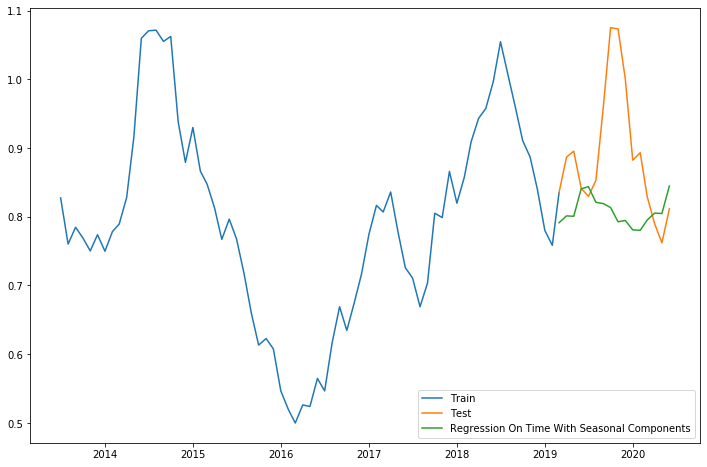

In [101]:
plt.figure(figsize=(12,8))
plt.plot( train['StainlessSteelPrice'], label='Train')
plt.plot(test['StainlessSteelPrice'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')
plt.show()

In [102]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.StainlessSteelPrice, y_test.RegOnTimeSeasonal))
rmse = round(rmse, 3)

In [103]:

# Mean Absolute Percentage Error
abs_error = np.abs(y_test['StainlessSteelPrice']-y_test['RegOnTimeSeasonal'])
actual = y_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),4)

In [105]:
dire = directional(y_test['StainlessSteelPrice'], y_test['RegOnTimeSeasonal'])

In [106]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'RMSE': [rmse],'MAPE': [mape], 'DS': [dire] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE', 'DS']]
resultsDf

,Method,RMSE,MAPE,DS
0,RegressionOnTime,0.125,0.0970,46.666667
0,RegressionOnTimeSeasonal,0.127,0.0979,33.333333


This results show the directional symmetry is not that good byt RMSE and MAPE is quite good for LR (with two methods)


##### DS value suggest that -The relation between the price of steel is low 